In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
dataset=pd.read_csv("Pre_AI_companies.csv")

In [63]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
dataset

,Company Name,Description,Headquarters,Founded,Annual Revenue,Glassdoor Score
0,Alibaba Cloud,Best for Big Data Analytics,China,2009.0,479.5,3.75
1,DataRobot,Best for Automated Machine Learning,Massachusetts,2012.0,338.2,3.75
2,Google,Best for AI Development,California,1998.0,305600.0,4.45
3,Hugging Face,Best for Deploying AI Models in the Cloud,New York,2016.0,40.0,4.35
4,H2O.ai,Best for Time Series Forecasting,California,2011.0,69.2,3.15
...,...,...,...,...,...,...
95,Nuro,Best for Driverless Operation,California,2016.0,438.8,3.85
96,Pony.ai,Best for Robotruck Development,California,2016.0,100.0,3.45
97,Tesla,Best for Electric Vehicles,Texas,2003.0,96770.0,3.65
98,Waymo,Best for Experience and Testing,California,2016.0,1400.0,3.75


In [65]:
dataset.describe()

,Founded,Annual Revenue,Glassdoor Score
count,100.000000,100.000000,100.000000
mean,2007.247500,16494.258600,3.945652
std,10.601973,69473.696996,0.432029
min,1984.375000,1.200000,2.950000
25%,2002.750000,35.350000,3.750000
50%,2012.000000,195.600000,3.897826
75%,2015.000000,1197.500000,4.350000
max,2022.000000,574790.000000,4.950000


In [66]:
def QuanQual(dataset):
    quan=[]
    qual=[]
    for ColumnName in dataset.columns:
        #print(ColumnName)
        if (dataset[ColumnName].dtypes=='O'):
            #print("qual")
            qual.append(ColumnName)
        else:
            #print("quan")
            quan.append(ColumnName)
    return quan,qual

In [67]:
quan,qual=QuanQual(dataset)

In [68]:
quan

['Founded', 'Annual Revenue', 'Glassdoor Score']

In [69]:
qual

['Company Name', 'Description', 'Headquarters']

## Performing the Univariate

In [70]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                "Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q5:100%",
                                "IQR","1.5Rule","Lesser","Greater","Min","Max","Kurtosis","Skewness","Variance","Std_deviation"],columns=quan)

for ColumnName in quan:
    
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]=dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]=dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["Q1:25%"]=dataset.describe()[ColumnName]["25%"] 
    descriptive[ColumnName]["Q2:50%"]=dataset.describe()[ColumnName]["50%"]
    descriptive[ColumnName]["Q3:75%"]=dataset.describe()[ColumnName]["75%"]
    descriptive[ColumnName]["Q4:99%"]=np.percentile(dataset[ColumnName],99)
    descriptive[ColumnName]["Q5:100%"]=dataset.describe()[ColumnName]["max"]
    descriptive[ColumnName]["IQR"]= descriptive[ColumnName]["Q3:75%"]-descriptive[ColumnName]["Q1:25%"]
    descriptive[ColumnName]["1.5Rule"]=1.5*descriptive[ColumnName]["IQR"]
    descriptive[ColumnName]["Lesser"]=descriptive[ColumnName]["Q1:25%"]-descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Greater"]=descriptive[ColumnName]["Q3:75%"]+descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Min"]=dataset[ColumnName].min()
    descriptive[ColumnName]["Max"]=dataset[ColumnName].max()
    descriptive[ColumnName]["Kurtosis"]=dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["Skewness"]=dataset[ColumnName].skew()
    descriptive[ColumnName]["Variance"]=dataset[ColumnName].var()
    descriptive[ColumnName]["Std_deviation"]=dataset[ColumnName].std()

In [71]:
descriptive

,Founded,Annual Revenue,Glassdoor Score
Mean,2007.2475,16494.2586,3.945652
Median,2012.0,195.6,3.897826
Mode,2012.0,5.0,3.75
Q1:25%,2002.75,35.35,3.75
Q2:50%,2012.0,195.6,3.897826
Q3:75%,2015.0,1197.5,4.35
Q4:99%,2019.03,308291.9,4.851
Q5:100%,2022.0,574790.0,4.95
IQR,12.25,1162.15,0.6
1.5Rule,18.375,1743.225,0.9


In [72]:
def ftable(columnName,dataset):
        ftable=pd.DataFrame(columns=["Unique_values","Frequency","Relative_Frequency","Cumsum"])
        ftable["Unique_values"]=dataset[columnName].value_counts().index
        ftable["Frequency"]=dataset[columnName].value_counts().values
        ftable["Relative_Frequency"]=ftable["Frequency"]/103
        ftable["Cumsum"]=ftable["Relative_Frequency"].cumsum()
        return ftable

In [73]:
ftable("Annual Revenue",dataset)

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,18.8,2,0.019417,0.019417
1,25.0,2,0.019417,0.038835
2,5.0,2,0.019417,0.058252
3,479.5,1,0.009709,0.067961
4,87.7,1,0.009709,0.077670
...,...,...,...,...
92,1570.0,1,0.009709,0.932039
93,37.7,1,0.009709,0.941748
94,210.0,1,0.009709,0.951456
95,4208.0,1,0.009709,0.961165


## Histplot

<Axes: xlabel='Glassdoor Score', ylabel='Count'>

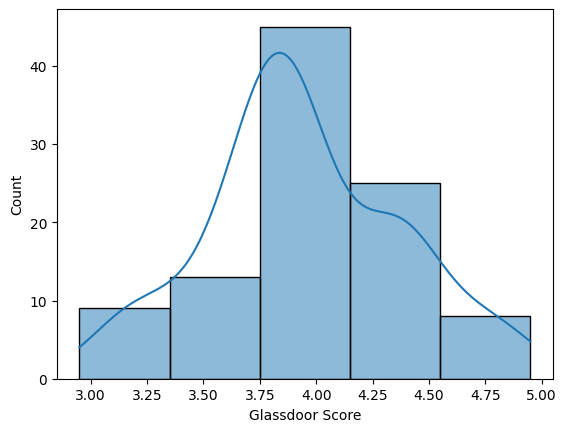

In [75]:
sns.histplot(dataset['Glassdoor Score'], bins=5, kde=True)

## ScatterPlot

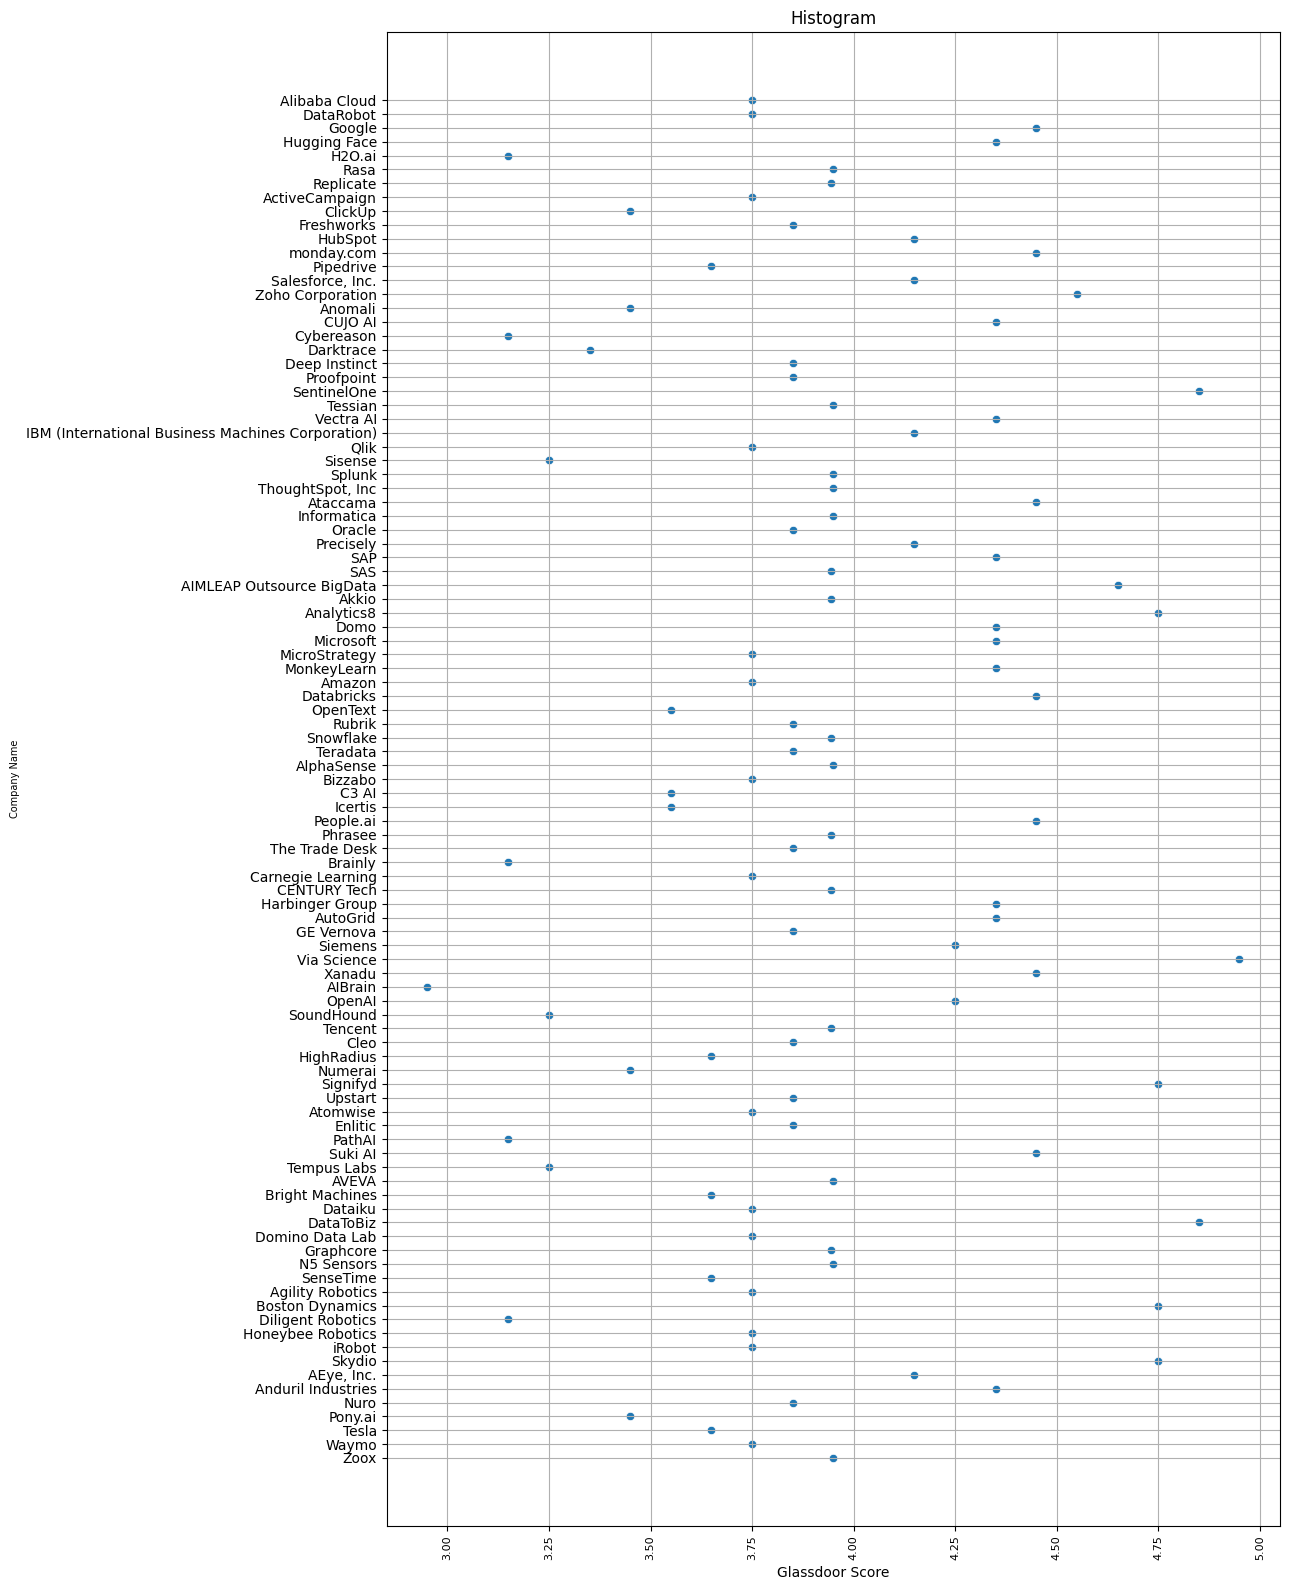

In [74]:
plt.figure(figsize=(13,16))
plt.grid(True)
sns.scatterplot(x='Glassdoor Score',y='Company Name',data=dataset)
plt.xlabel('Glassdoor Score')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Company Name',fontsize=7)
plt.title('Histogram')
plt.tight_layout()
plt.show()